# Task 2 Predictive Analytics

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import datetime
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the Dataset

In [2]:
# read the dataset
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx', sheet_name='DSynth_Output_100c_3m_v3')

## 2. Data Preprocessing

In [3]:
# filter out the items with salary only
new_data = data[data['txn_description'] == 'PAY/SALARY']
new_data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,26,NaN,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit
12000,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit
12003,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,...,20,NaN,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit


In [4]:
# overview of the salary dataset
new_data.profile_report()

## 3. Data Analysis
### 3.1 Annual Salary Analysis

In [5]:
# calculate annual salary for each account
sub_group = new_data.groupby(['account','age','gender']).sum()
sub_group.to_csv('salary_review')
salary_review = pd.read_csv('salary_review')
salary_review = salary_review.drop(labels=['card_present_flag','merchant_code','balance'],axis=1)
salary_review

,account,age,gender,amount
0,ACC-1037050564,40,F,11597.17
1,ACC-1056639002,22,M,19170.06
2,ACC-1199531521,52,M,26500.46
3,ACC-1217063613,27,F,9727.24
4,ACC-1222300524,38,M,13027.69
...,...,...,...,...
95,ACC-854938045,28,M,17770.76
96,ACC-90814749,35,M,13852.02
97,ACC-958000567,34,F,24623.27
98,ACC-964839203,21,M,20282.60


In [6]:
# add customers' attributes including the location and account balance
data_add = data[['account','merchant_state','balance']]
salary_all = salary_review.merge(data_add, on='account')
salary_all

,account,age,gender,amount,merchant_state,balance
0,ACC-1037050564,40,F,11597.17,QLD,2117.22
1,ACC-1037050564,40,F,11597.17,QLD,2072.10
2,ACC-1037050564,40,F,11597.17,NaN,2040.10
3,ACC-1037050564,40,F,11597.17,NSW,2029.05
4,ACC-1037050564,40,F,11597.17,QLD,1963.94
...,...,...,...,...,...,...
12038,ACC-966140392,21,M,18010.37,VIC,12119.88
12039,ACC-966140392,21,M,18010.37,VIC,12096.19
12040,ACC-966140392,21,M,18010.37,VIC,12082.43
12041,ACC-966140392,21,M,18010.37,VIC,12071.16


In [7]:
salary_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account         12043 non-null  object 
 1   age             12043 non-null  int64  
 2   gender          12043 non-null  object 
 3   amount          12043 non-null  float64
 4   merchant_state  7717 non-null   object 
 5   balance         12043 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 658.6+ KB


Given the large amount of missing values on merchant locations, they are not taken into consideration at this stage.  
Based on above overview of the data, in this case, customers' gender, age, balance will be analysed in terms of their annual salary.

In [8]:
# keep the last balance of the customer only for the analysis
salary_all.drop_duplicates(subset=['account'], keep='last',inplace=True)
new_salary = salary_all.drop(labels='merchant_state', axis=1)
new_salary.reset_index(drop=True, inplace=True)

In [9]:
# transfer the gender data into number, 
# so that it can be checked if there is correlation between gender and salary.
new_salary['gender'].replace('F', '0',inplace=True)
new_salary['gender'].replace('M', '1',inplace=True)

In [10]:
# new dataset for regression analysis
new_salary

,account,age,gender,amount,balance
0,ACC-1037050564,40,0,11597.17,6033.02
1,ACC-1056639002,22,1,19170.06,56489.54
2,ACC-1199531521,52,1,26500.46,20773.38
3,ACC-1217063613,27,0,9727.24,8844.02
4,ACC-1222300524,38,1,13027.69,2321.06
...,...,...,...,...,...
95,ACC-854938045,28,1,17770.76,15887.31
96,ACC-90814749,35,1,13852.02,12876.85
97,ACC-958000567,34,0,24623.27,12881.33
98,ACC-964839203,21,1,20282.60,42342.39


### 3.2 Regression Analysis
#### 3.2.1 Linear Regression

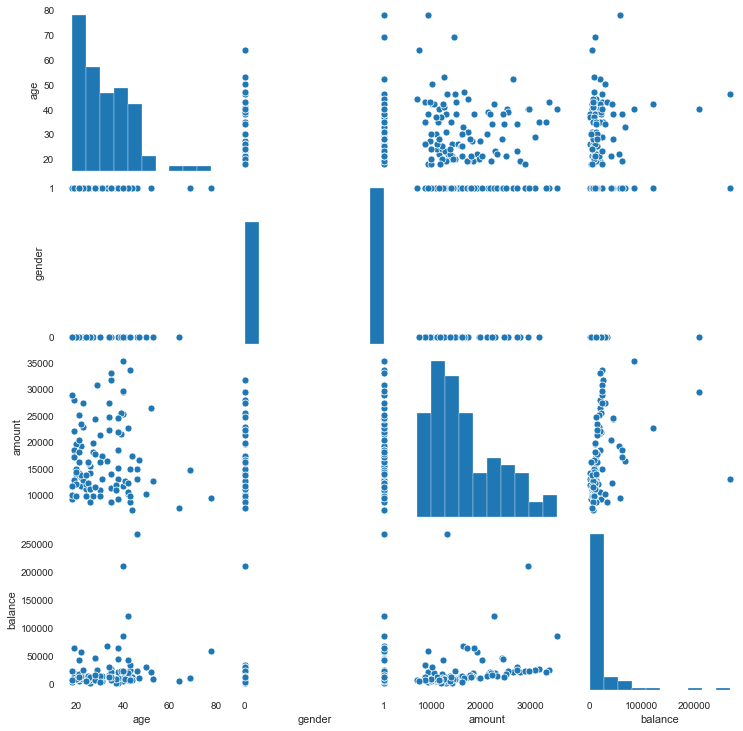

In [11]:
# overview of the correlation between each item
sns.pairplot(new_salary)
plt.show()

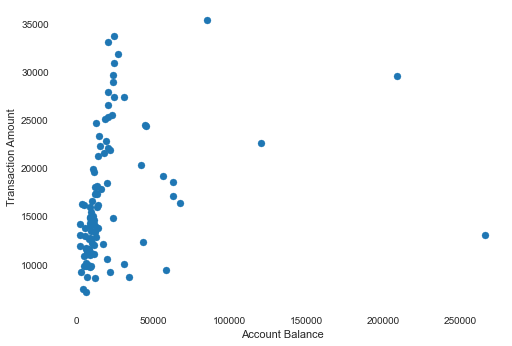

In [12]:
# take a further look at on the correlation between account balance and annual salary
plt.scatter(new_salary.balance, new_salary.amount)
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.show()

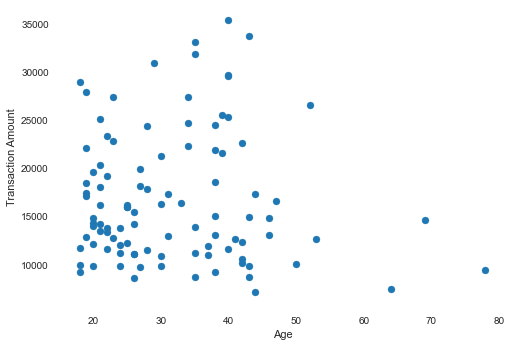

In [13]:
# plot the correlation between age and annual salary
plt.scatter(new_salary.age, new_salary.amount)
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()

In [14]:
# check the correlation coefficient
corr = new_salary.corr()
corr

,age,amount,balance
age,1.000000,-0.036504,0.225994
amount,-0.036504,1.000000,0.263946
balance,0.225994,0.263946,1.000000


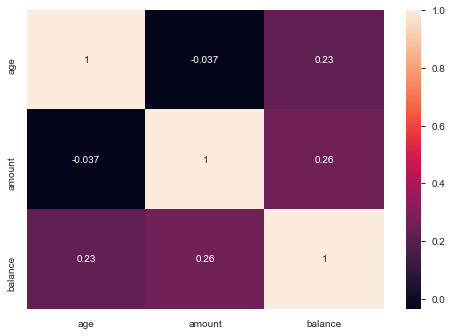

In [15]:
sns.heatmap(corr, annot=True)

It can be noticed that there is only a week correlation between account balance and annual salary.

In [16]:
lr_model = LinearRegression()

In [17]:
X = new_salary[['balance']]
y = new_salary[['amount']]

In [18]:
lr_model.fit(X,y)
# evaluate the linear regression model
lr_model.score(X,y)

0.06966725743062263

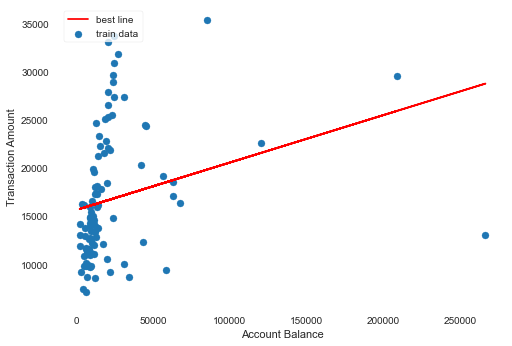

In [19]:
# plot "best line" in linear regression model
plt.scatter(new_salary.balance, new_salary.amount, label = 'train data')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
Y_train_pred = lr_model.predict(X)
plt.plot(X, Y_train_pred, color = 'red', label = 'best line')
plt.legend(loc=2)
plt.show()

Given the score of the linear regression model (R^2=0.07), it can be proved that the correlationship beween the account balance and annual salary is pretty week. 
Thus, the model is not accurate for further reporting and segment analysis.

#### 3.2.2 Decision Tree Regression

In [20]:
# develop a decision-tree regression model accordingly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
T_model = DecisionTreeRegressor(random_state=0)
T_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [21]:
y_pred = T_model.predict(X_test)

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(T_model,X,y,cv=10)
score

array([-0.62419831,  0.40364485, -0.8133539 , -0.63636765, -0.91929247,
        0.14303215, -0.1384061 , -0.7351082 ,  0.56371026,  0.01376389])

In [23]:
T_model.score(X,y)

0.8567366267116875

The score of the model significantly increased which means the performance of the model improved a lot based on the model score (0.86>0.07)